In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1500

In [3]:
df = pd.read_excel('C:/Users/Anastasiya.Mittseva/PycharmProjects/ProjectPredictSolidity/prepared_data.xlsx')

In [4]:
df

Сталь      С     Mn    Si       S      P    Cr    Ni  \
0                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
1                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
2                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
3                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
4                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
5                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
6                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
7                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
8                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
9                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23   NaN   
10                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
11                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
12                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
13                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
14                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
15                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
16                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
17                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
18                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
19                      32г2  0.360  1.400  0.30  0.0250  0.019   NaN   NaN   
20                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
21                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
22                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
23                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
24                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
25                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
26                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
27                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
28                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
29                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
30                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
31                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
32                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
33                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
34                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
35                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
36                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
37                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
38                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
39                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
40                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
41                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
42                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
43                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
44                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
45                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.00   
46                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.00   
47                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.00   
48                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.00   
49                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.

## Подготовка данных

In [5]:
def convertHRCtoHV(x):
    y = 0.0001076546813696400 * x ** 4 - 0.01404920211793480 * x ** 3 + 0.7989548243359580 * x ** 2 - 13.82475417563670 * x + 289.8692821768870
    return y

In [6]:
def repl(x):
    if np.isnan(x):
        return round(convertHRCtoHV(df['HRC'].loc[x.index]),2)
    else:
        return x

In [7]:
df['HRC'] = df['HRC'].map(convertHRCtoHV)

In [8]:
df['HV'] = df['HV'].combine_first(df['HRC'])

In [9]:
df = df.drop('HRC',1)

In [10]:
df = df.fillna(0)

In [11]:
df = df[~(df['HV'] == 0.0)]

In [12]:
df = df.drop(df[df['%А остаточный'] != 0].index)

In [13]:
df = df.drop('%А остаточный',1)

In [14]:
df = df[~(df['V800-500 °C/c']== 0.0)]

In [17]:
# df = df.drop(df[(df['%Ф']+df['%П']+df['%Б']+df['%М']) != 100].index)

In [15]:
df = df.reset_index()

In [16]:
df = df.drop('index',1)

In [17]:
df

Сталь      С     Mn    Si       S      P    Cr    Ni  \
0                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
1                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
2                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
3                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
4                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
5                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
6                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
7                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
8                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
9                       32г2  0.320  1.100  0.27  0.0200  0.017  0.23  0.00   
10                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
11                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
12                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
13                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
14                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
15                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
16                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
17                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
18                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
19                      32г2  0.360  1.400  0.30  0.0250  0.019  0.00  0.00   
20                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
21                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
22                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
23                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
24                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
25                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
26                    X65NbV  0.110  1.020  0.28  0.0015  0.009  0.13  0.01   
27                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
28                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
29                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
30                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
31                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
32                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
33                  x65 TiMo  0.100  0.980  0.25  0.0018  0.006  0.30  0.06   
34                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
35                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
36                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
37                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
38                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
39                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
40                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
41                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
42                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
43                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
44                   sae6115  0.150  0.670  0.48  0.0240  0.044  1.20  0.25   
45                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.00   
46                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.00   
47                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.00   
48                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.00   
49                   sae1042  0.440  0.660  0.22  0.0290  0.022  0.15  0.

## Графики 

In [18]:
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

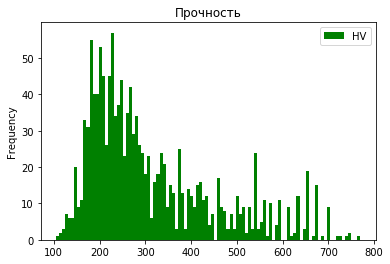

In [19]:
df.plot(y='HV', kind='hist', color='green', title='Прочность', bins=100)
plt.show()

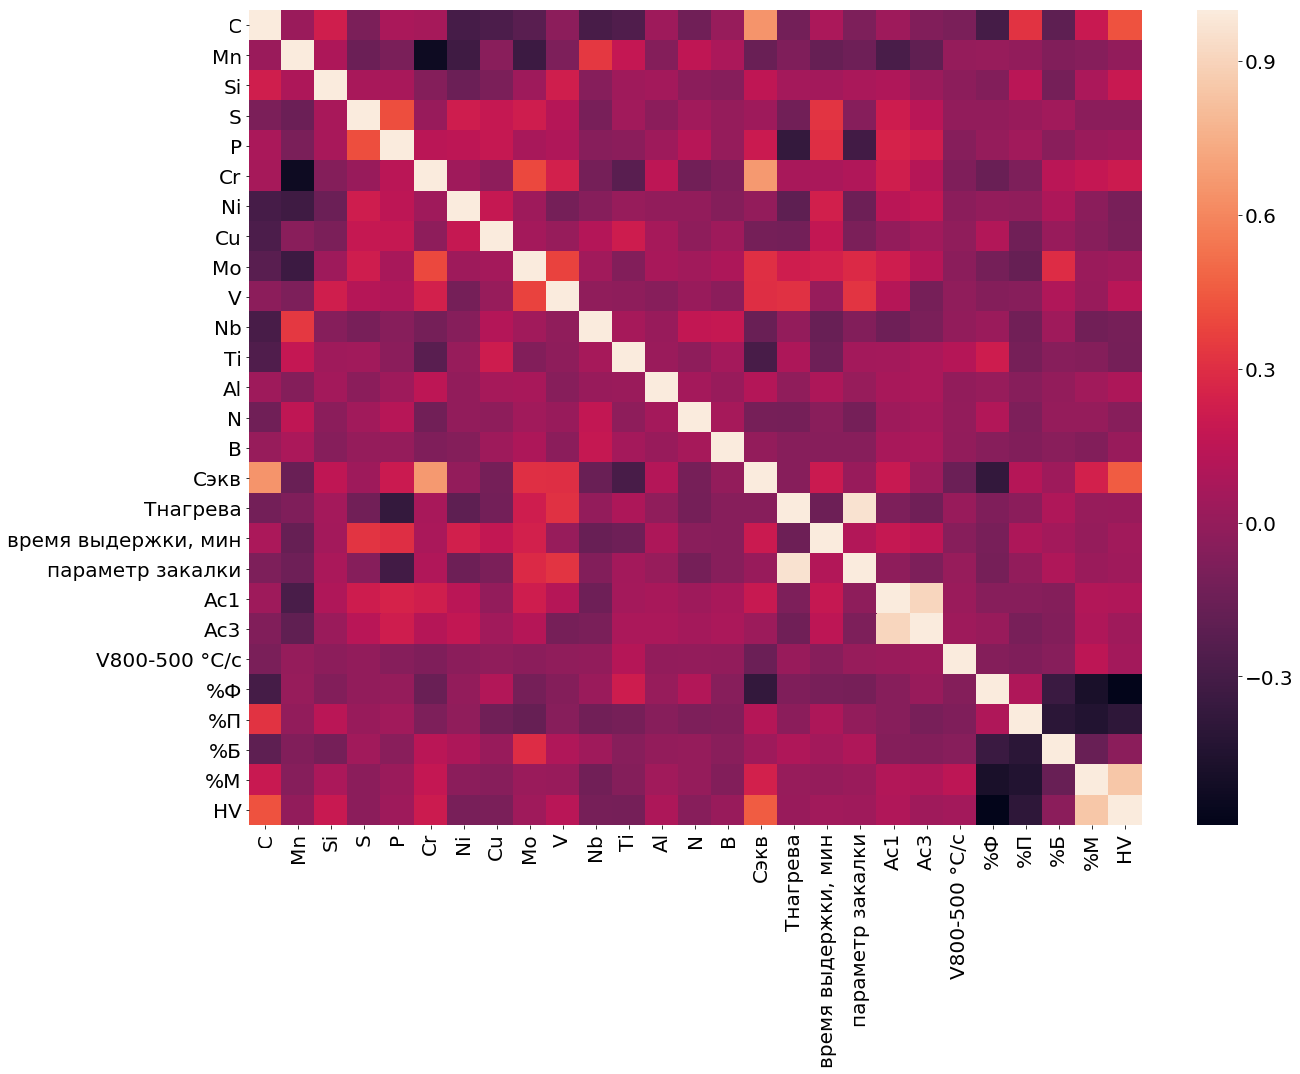

In [20]:
plt.rcParams.update({'font.size': 20})
plt.subplots(figsize=(20,15))

corr = df.corr()
corr_hm = sns.heatmap(corr)
fig = corr_hm.get_figure()

In [21]:
df_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti',
       'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']

In [22]:
ls_targets = ['HV']

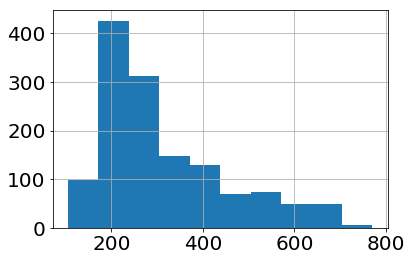

In [23]:
df['HV'].hist()

In [24]:
df[df_col+ ls_targets].corr()

С        Mn        Si         S         P        Cr  \
С                 1.000000  0.022486  0.226186 -0.091789  0.074458  0.066421   
Mn                0.022486  1.000000  0.092524 -0.149970 -0.099112 -0.532124   
Si                0.226186  0.092524  1.000000  0.070160  0.069809 -0.058847   
S                -0.091789 -0.149970  0.070160  1.000000  0.415353  0.013051   
P                 0.074458 -0.099112  0.069809  0.415353  1.000000  0.138013   
Cr                0.066421 -0.532124 -0.058847  0.013051  0.138013  1.000000   
Ni               -0.293022 -0.325844 -0.152401  0.220481  0.153027  0.042485   
Cu               -0.271731 -0.040339 -0.087445  0.182515  0.184786 -0.022534   
Mo               -0.218786 -0.337657  0.036406  0.219449  0.074141  0.393271   
V                -0.026575 -0.081249  0.223461  0.121545  0.095546  0.239077   
Nb               -0.291048  0.340137 -0.051293 -0.104292 -0.048596 -0.117373   
Ti               -0.258283  0.177612  0.039168  0.049143 -0.032777 -0.221517   
Al                0.033419 -0.061887  0.054298 -0.033793  0.031337  0.149413   
N                -0.131445  0.159054 -0.034248  0.043601  0.127690 -0.127546   
B                 0.008125  0.083250 -0.052124  0.000728  0.003482 -0.076169   
Сэкв              0.650007 -0.161628  0.155483  0.035054  0.201159  0.665919   
параметр закалки -0.085640 -0.140595  0.074988 -0.053775 -0.312487  0.100892   
V800-500 °C/c    -0.098997  0.001943 -0.026737 -0.009946 -0.052985 -0.075095   
HV                0.425368 -0.010261  0.195618 -0.034066  0.034932  0.209738   

                        Ni        Cu        Mo         V        Nb        Ti  \
С                -0.293022 -0.271731 -0.218786 -0.026575 -0.291048 -0.258283   
Mn               -0.325844 -0.040339 -0.337657 -0.081249  0.340137  0.177612   
Si               -0.152401 -0.087445  0.036406  0.223461 -0.051293  0.039168   
S                 0.220481  0.182515  0.219449  0.121545 -0.104292  0.049143   
P                 0.153027  0.184786  0.074141  0.095546 -0.048596 -0.032777   
Cr                0.042485 -0.022534  0.393271  0.239077 -0.117373 -0.221517   
Ni                1.000000  0.180683  0.035467 -0.117940 -0.050288  0.006475   
Cu                0.180683  1.000000  0.058182  0.008497  0.111958  0.216905   
Mo                0.035467  0.058182  1.000000  0.377756  0.047911 -0.067611   
V                -0.117940  0.008497  0.377756  1.000000 -0.017463 -0.023698   
Nb               -0.050288  0.111958  0.047911 -0.017463  1.000000  0.064894   
Ti                0.006475  0.216905 -0.067611 -0.023698  0.064894  1.000000   
Al               -0.012271  0.063091  0.072511 -0.043936  0.017729  0.023924   
N                -0.007724 -0.020856  0.047594  0.015953  0.169662 -0.019372   
B                -0.057017  0.030745  0.089622 -0.035512  0.182959  0.058463   
Сэкв             -0.001815 -0.115784  0.308417  0.300880 -0.159635 -0.287842   
параметр закалки -0.145081 -0.088841  0.283925  0.324373 -0.063285  0.049994   
V800-500 °C/c    -0.034893 -0.018248 -0.035070 -0.016673 -0.007859  0.121203   
HV               -0.100336 -0.099034  0.041264  0.132291 -0.108961 -0.114314   

                        Al         N         B      Сэкв  параметр закалки  \
С                 0.033419 -0.131445  0.008125  0.650007         -0.085640   
Mn               -0.061887  0.159054  0.083250 -0.161628         -0.140595   
Si                0.054298 -0.034248 -0.052124  0.155483          0.074988   
S                -0.033793  0.043601  0.000728  0.035054         -0.053775   
P                 0.031337  0.127690  0.003482  0.201159         -0.312487   
Cr                0.149413 -0.127546 -0.076169  0.665919          0.100892   
Ni               -0.012271 -0.007724 -0.057017 -0.001815         -0.145081   
Cu                0.063091 -0.020856  0.030745 -0.115784         -0.088841   
Mo                0.072511  0.047594  0.089622  0.308417          0.283925   
V                -0.043936  0.015953 -0.035

In [25]:
df[df_col].corrwith(df['HV'])

С                   0.425368
Mn                 -0.010261
Si                  0.195618
S                  -0.034066
P                   0.034932
Cr                  0.209738
Ni                 -0.100336
Cu                 -0.099034
Mo                  0.041264
V                   0.132291
Nb                 -0.108961
Ti                 -0.114314
Al                  0.087807
N                  -0.047175
B                   0.013651
Сэкв                0.454267
параметр закалки    0.040503
V800-500 °C/c       0.050479
dtype: float64

## train_test_split 

In [43]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

rfr = RandomForestRegressor(max_features = 10, max_depth = 15, min_samples_leaf = 2, n_estimators=100, criterion='mse')

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [44]:
x_train,  x_test,  y_train,  y_test  =  train_test_split (x, y, test_size=0.3)

In [45]:
rfr.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [46]:
test_scr, test_r2, test_mae, test_mse, test_corr = print_and_return_score(x_test, y_test, rfr)

Score:  0.9
R^2:  0.9
MAE:  29.46
MSE:  2136.04
Correlation  0.95


In [47]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.87
R^2:  0.87
MAE:  32.33
MSE:  2519.73
Correlation  0.94


In [48]:
y_predict_test = rfr.predict(x_test)

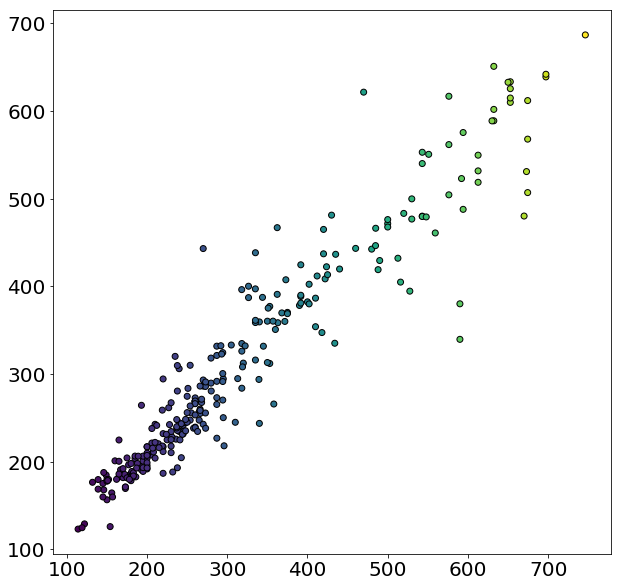

In [49]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [50]:
y_predict_valid = rfr.predict(x_valid)

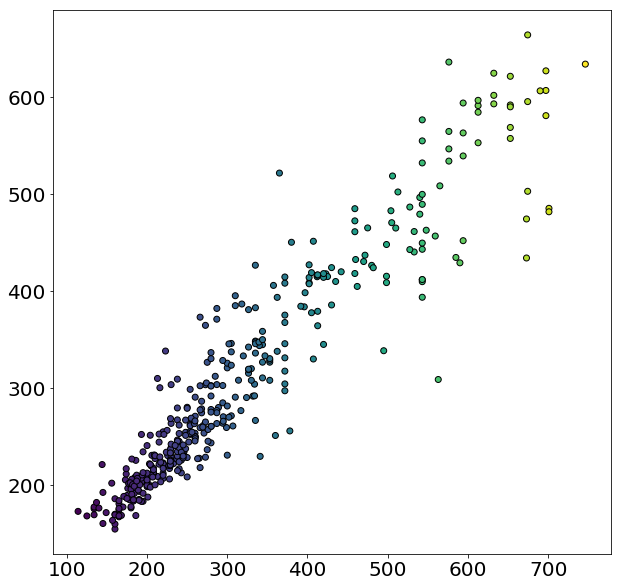

In [51]:
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [41]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(test_corr) + '_test_r2_' + str(test_r2) + '_train_test_split.sav'
pickle.dump(rfr, open(filename, 'wb'))

##  KFold

In [132]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

rfr = RandomForestRegressor(max_features = 12, max_depth = 15, min_samples_leaf = 1, n_estimators=200, criterion='mse')

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [133]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr.fit(x_train, y_train)
    
    scores.append(print_and_return_score(x_test, y_test, rfr))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.9
R^2:  0.9
MAE:  28.74
MSE:  1889.0
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.91
R^2:  0.91
MAE:  24.12
MSE:  1388.99
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.9
R^2:  0.9
MAE:  30.33
MSE:  1845.09
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.91
R^2:  0.91
MAE:  27.84
MSE:  1721.95
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.91
R^2:  0.91
MAE:  27.82
MSE:  1797.97
Correlation  0.96


In [134]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.91
0.91
27.77
1728.6
0.95


In [135]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.91
R^2:  0.91
MAE:  26.83
MSE:  1926.68
Correlation  0.96


In [136]:
y_predict = rfr.predict(x_test)

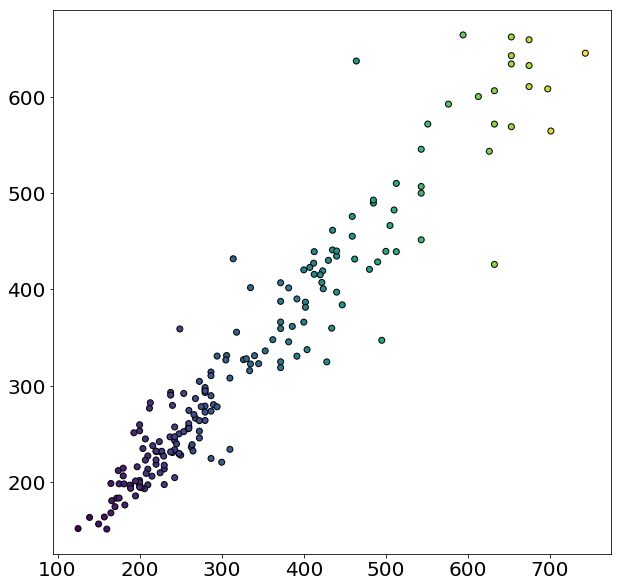

In [137]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [138]:
y_predict = rfr.predict(x_valid)

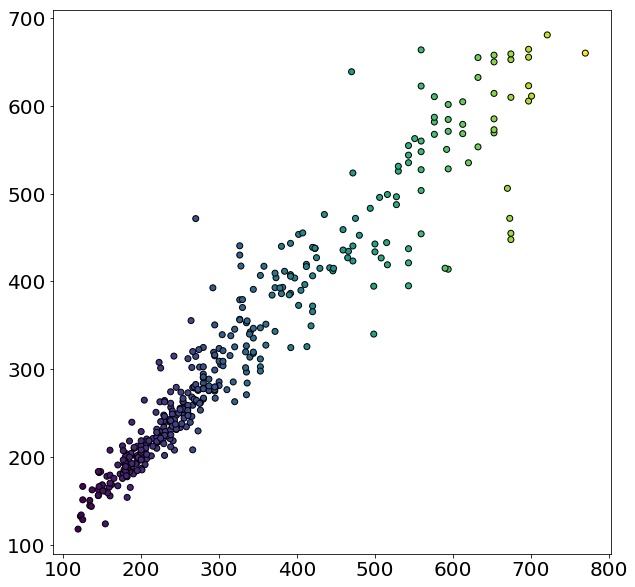

In [139]:
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [140]:
y_predict_to_dataframe = pd.DataFrame({'y_predict': y_predict})

In [141]:
y_valid_to_dataframe = y_valid.reset_index()

In [143]:
 result = pd.merge(y_valid_to_dataframe, y_predict_to_dataframe, left_index=True, right_index=True)

In [144]:
result

index          HV   y_predict
0      921  423.000000  437.793031
1      874  292.000000  392.690552
2     1076  559.265567  559.800298
3      531  241.000000  218.521493
4      591  209.000000  216.017083
5     1247  236.000000  224.714775
6      366  134.000000  150.586465
7      199  475.000000  471.747963
8      650  220.000000  209.927645
9      826  286.919258  275.588319
10     607  204.000000  200.590750
11     711  300.000000  285.648293
12    1149  187.000000  202.153179
13     635  250.000000  252.107850
14     800  620.000000  535.044110
15     242  237.000000  220.901226
16     969  392.000000  324.602142
17     216  190.000000  182.070000
18    1027  352.962535  347.141395
19      28  180.000000  200.503194
20    1184  559.265567  547.729997
21    1107  223.000000  217.968176
22     391  559.265567  527.194014
23     762  229.000000  247.790393
24     316  697.198412  605.337618
25     220  230.000000  264.332350
26     895  255.000000  247.793410
27     880  279.720653  324.766381
28     357  154.000000  123.910000
29    1208  527.553165  496.369302
30     365  122.000000  132.480000
31     868  191.000000  209.885254
32      27  146.000000  182.286849
33    1099  145.000000  156.103683
34    1282  429.353959  414.857038
35     882  335.092403  352.882901
36     238  204.000000  205.627490
37    1287  352.962535  311.649252
38    1109  266.131020  208.201404
39    1307  181.000000  203.797480
40    1334  176.000000  212.718002
41     442  279.720653  284.227262
42     180  190.000000  180.807917
43     276  237.787260  231.305395
44     784  245.000000  247.536509
45     129  391.653883  386.370543
46     992  187.000000  204.091421
47    1232  471.687235  423.234189
48     462  343.912311  390.910128
49     631  397.000000  403.875742
50     825  279.720653  265.952243
51    1245  205.000000  191.352364
52     484  182.000000  201.848101
53     751  276.000000  253.396903
54    1176  652.823417  585.068267
55     732  320.000000  345.509916
56     816  300.000000  281.282963
57     118  373.000000  404.220066
58     949  230.000000  238.636710
59     867  178.000000  192.915957
60     760  188.000000  239.647711
61     696  516.000000  498.932175
62     399  224.000000  262.873529
63      88  188.000000  188.899903
64      95  412.000000  419.401339
65     982  371.786223  343.069787
66     125  237.787260  239.636187
67    1354  221.000000  218.230673
68     490  423.000000  437.535986
69     280  294.368539  299.019457
70     524  632.251555  654.866673
71     897  335.000000  326.604103
72     736  220.000000  216.293798
73     569  380.000000  386.068758
74    1058  195.000000  212.312949
75     536  420.000000  406.353932
76     814  250.000000  255.509566
77     848  195.000000  194.232516
78     533  265.000000  246.257322
79    1008  527.553165  487.383781
80    1132  137.000000  162.618936
81     470  326.497969  379.027109
82     170  225.000000  224.580160
83     716  245.000000  231.305395
84    1243  594.017762  584.400861
85      46  210.000000  201.042995
86     208  245.000000  232.761341
87     205  185.000000  183.220000
88    1182  339.473931  313.747936
89    1333  162.000000  168.552968
90    1101  145.000000  162.922613
91    1122  193.000000  192.199345
92     418  205.000000  203.438122
93     175  360.000000  351.251207
94    1202  343.912311  335.489616
95      32  273.000000  275.828073
96      87  181.000000  181.589500
97     272  227.000000  229.689693
98     962  410.000000  396.387577
99     124  200.000000  204.945681
100    548  242.715651  207.891124
101    953  543.055389  554.650911
102    678  173.000000  180.621667
103   1084  612.670232  578.824414
104    870  201.000000  211.930203
105    296  459.044960  458.936090
106    351  123.000000  134.025000
107    961  390.000000  384.721962
108   1157  576.235047  581.518085
109    431  302.057834  305.256232
110   1257  352.962535  302.779906
111   1045  253.736590  255.468647
112    564  494.000000  483.199839
113    738  250

In [146]:
result.to_excel('predict_valid_HV.xlsx')

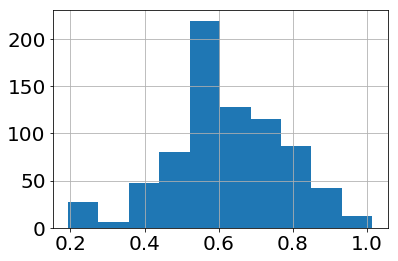

In [147]:
x_train['Сэкв'].hist()

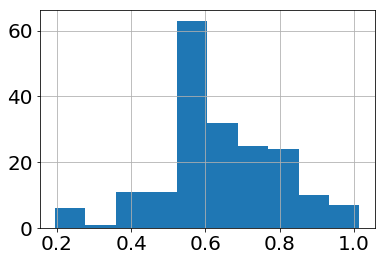

In [148]:
x_test['Сэкв'].hist()

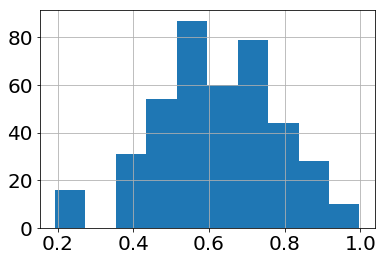

In [149]:
x_valid['Сэкв'].hist()

In [150]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(listScore[4]) + '_test_r2_' + str(listScore[1]) + '_K_fold.sav'
pickle.dump(rfr, open(filename, 'wb'))

## GridSearchCV

In [102]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [103]:
param_grid = {
    'max_depth': range(6, 18, 2),
    'max_features': range(6, 18, 2),
    'min_samples_leaf': range(1, 5),
    'n_estimators': range(50, 300, 50)
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='neg_mean_absolute_error')

In [104]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  3.4min finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(6, 18, 2), 'max_features': range(6, 18, 2), 'min_samples_leaf': range(1, 5), 'n_estimators': range(50, 300, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [105]:
grid_search.best_params_

{'max_depth': 16,
 'max_features': 14,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [106]:
test_scr, test_r2, test_mae, test_mse, test_corr = print_and_return_score(x_test, y_test, grid_search)

Score:  -25.87
R^2:  0.9
MAE:  25.87
MSE:  1735.54
Correlation  0.95


In [107]:
y_predict_test = grid_search.predict(x_test)

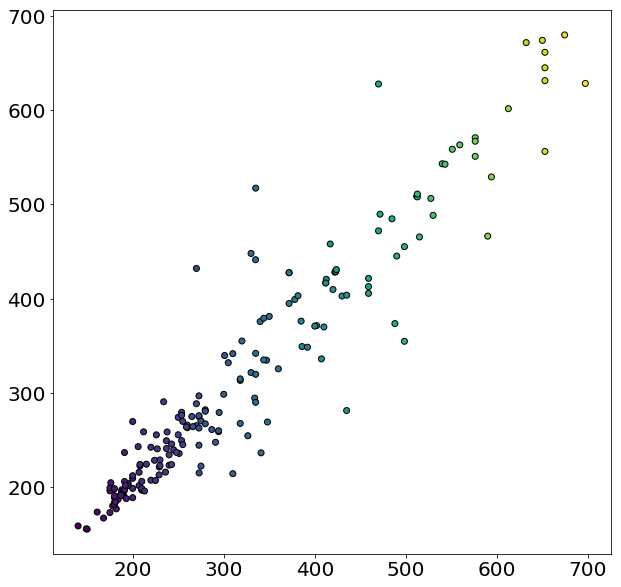

In [108]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
# plt.colorbar()
plt.show()

In [109]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr  = print_and_return_score(x_valid, y_valid, grid_search)

Score:  -20.03
R^2:  0.94
MAE:  20.03
MSE:  1135.63
Correlation  0.97


In [110]:
y_predict_valid = grid_search.predict(x_valid)

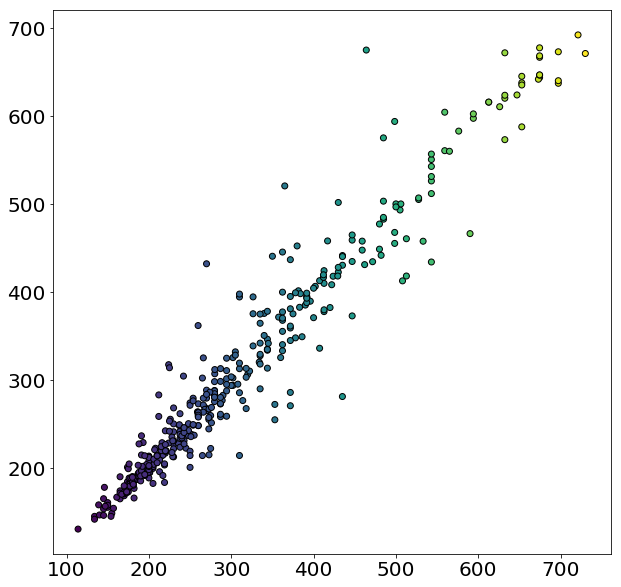

In [111]:
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [63]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(test_corr) + '_test_r2_' + str(test_r2) + '_train_test_split_gridSearch.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [99]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr = grid_search.best_estimator_
    rfr.fit(x_train, y_train)

    scores.append(print_and_return_score(x_test, y_test, rfr))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.91
R^2:  0.91
MAE:  27.37
MSE:  1606.35
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.93
R^2:  0.93
MAE:  23.88
MSE:  1212.76
Correlation  0.97


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.92
R^2:  0.92
MAE:  29.12
MSE:  1728.83
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.91
R^2:  0.91
MAE:  30.19
MSE:  1984.13
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.9
R^2:  0.9
MAE:  26.72
MSE:  1852.67
Correlation  0.95


In [100]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.91
0.91
27.46
1676.95
0.96


In [101]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.89
R^2:  0.89
MAE:  29.53
MSE:  2078.07
Correlation  0.95


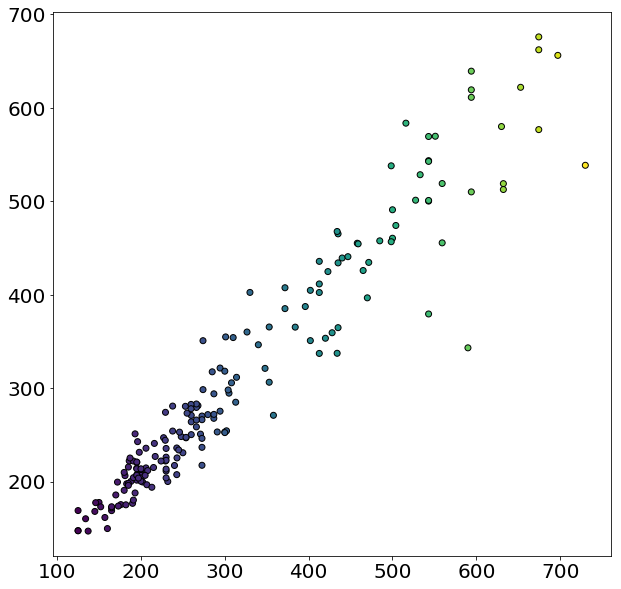

In [77]:
y_predict_test = rfr.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

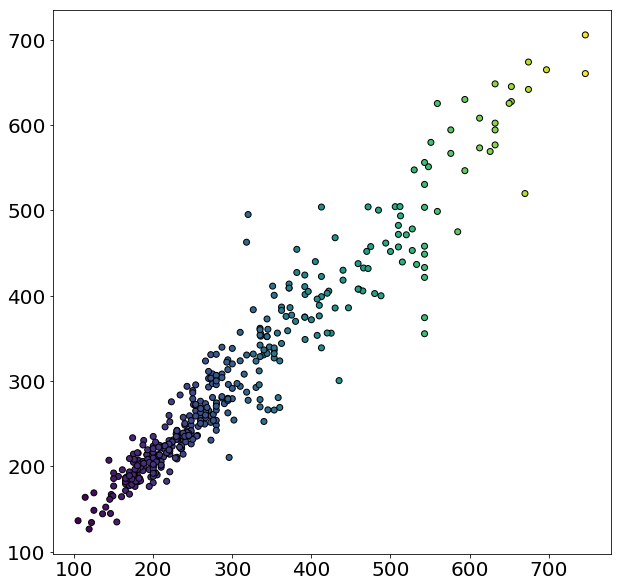

In [78]:
y_predict_valid = rfr.predict(x_valid)

plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [79]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(listScore[4]) + '_test_r2_' + str(listScore[1]) + '_K_fold_GridSearch.sav'
pickle.dump(rfr, open(filename, 'wb'))

## Loaded_model 

In [151]:
loaded_model = pickle.load(open('model_RFR_corr_valid_0.9561486258289654_valid_r2_0.9101636386129961corr_test_0.95_test_r2_0.91_K_fold.sav', 'rb'))

In [152]:
result = loaded_model.score(x_test, y_test)
print(result)

0.911136318450453


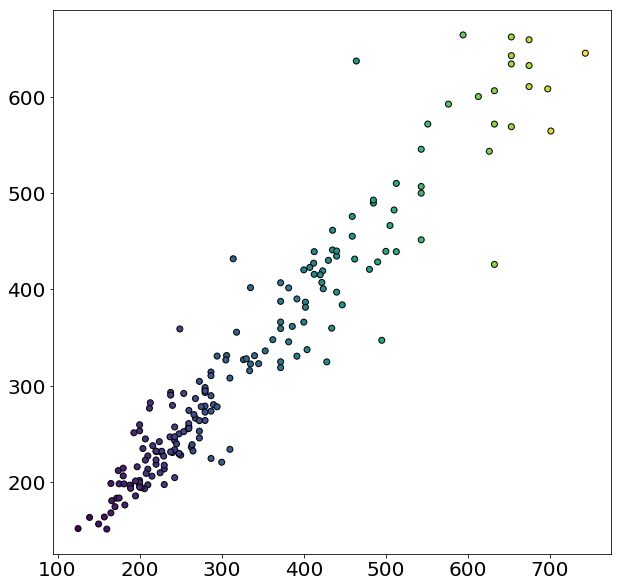

In [153]:
y_predict_test = loaded_model.predict(x_test)
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [154]:
result = loaded_model.score(x_valid, y_valid)
print(result)

0.9101636386129961


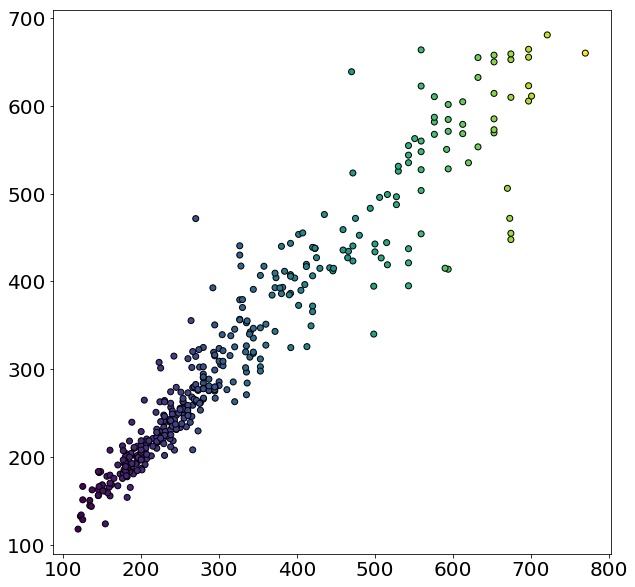

In [155]:
y_predict_valid = loaded_model.predict(x_valid)
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()